In [8]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
print(os.listdir("/content/resizedCellsImagesMalaria/Resized-Parasitized"))

sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

['C151P112ThinF_IMG_20151115_121725_cell_225.png', 'C189P150ThinF_IMG_20151203_141901_cell_75.png', 'C182P143NThinF_IMG_20151201_171905_cell_152.png', 'C68P29N_ThinF_IMG_20150819_133447_cell_166.png', 'C81P42ThinF_IMG_20150817_120712_cell_164.png', 'C182P143NThinF_IMG_20151201_172257_cell_193.png', 'C180P141NThinF_IMG_20151201_165453_cell_51.png', 'C184P145ThinF_IMG_20151203_102543_cell_150.png', 'C184P145ThinF_IMG_20151203_102543_cell_169.png', 'C48P9thinF_IMG_20150721_162732_cell_3.png', 'C80P41ThinF_IMG_20150817_111121_cell_161.png', 'C68P29N_ThinF_IMG_20150819_134712_cell_41.png', 'C182P143NThinF_IMG_20151201_172759_cell_25.png', 'C174P135NThinF_IMG_20151127_135640_cell_181.png', 'C136P97ThinF_IMG_20151005_140646_cell_114.png', 'C117P78ThinF_IMG_20150930_214629_cell_103.png', 'C68P29N_ThinF_IMG_20150819_133236_cell_206.png', 'C85P46ThinF_IMG_20150820_105748_cell_257.png', 'C81P42ThinF_IMG_20150817_121113_cell_178.png', 'C128P89ThinF_IMG_20151004_131753_cell_131.png', 'C133P94ThinF_

In [5]:
from zipfile import ZipFile
file_name ="/content/drive/My Drive/resized-malaria-cell-images.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Done")

Done


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Invected Images**

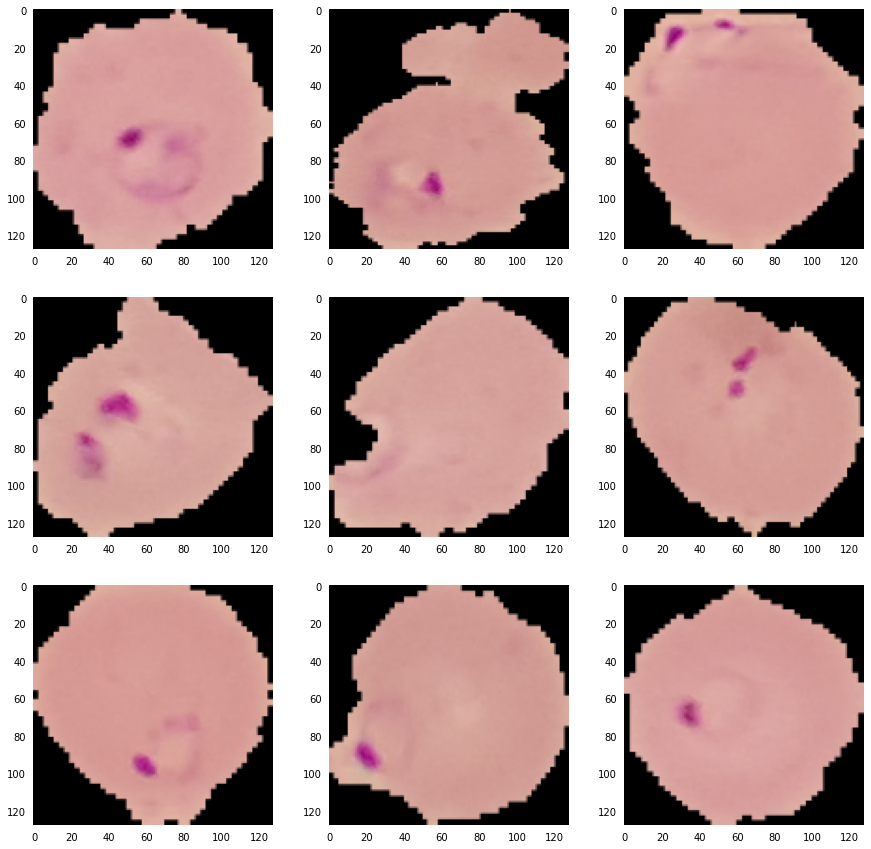

In [10]:
im_list = [162+i for i in range(9)]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
for i in enumerate(im_list):
    img = plt.imread("/content/resizedCellsImagesMalaria/Resized-Parasitized/C100P61ThinF_IMG_20150918_144104_cell_"+str(i[1])+".png")
    ax=axes[i[0]//3,i[0]%3]
    ax.imshow(img)           

**UnInfected Image**

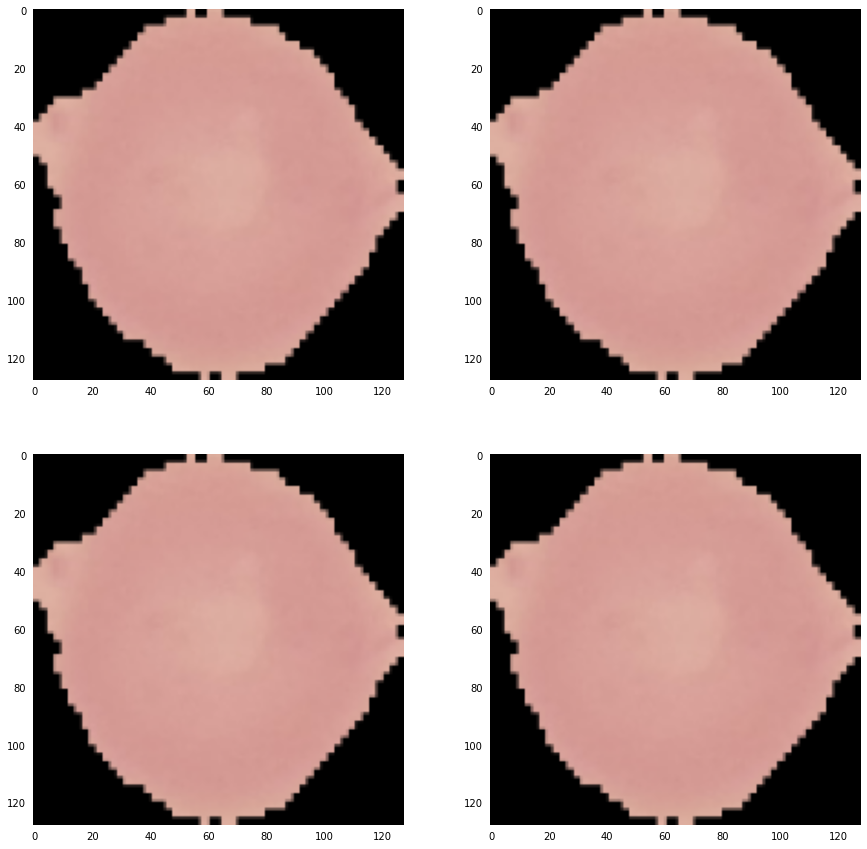

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
img1 = plt.imread("/content/resizedCellsImagesMalaria/Resized-Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png")
img2 = plt.imread("/content/resizedCellsImagesMalaria/Resized-Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png")
img3 = plt.imread("/content/resizedCellsImagesMalaria/Resized-Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png")
img4 = plt.imread("/content/resizedCellsImagesMalaria/Resized-Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png")

ax = axes[0,0]
ax1 = axes[0,1]
ax2 = axes[1,0]
ax3 = axes[1,1]

ax.imshow(img1)
ax1.imshow(img2)
ax2.imshow(img3)
ax3.imshow(img4)

In [0]:
classifier = Sequential()

In [0]:
#Adding 1st Convolution and Pooling Layer
classifier.add(Conv2D(32,kernel_size=(3,3),input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

#Adding 2nd Convolution and Pooling Layer
classifier.add(Conv2D(32,kernel_size=(3,3),activation = 'relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

#Adding 3rd Convolution and Pooling Layer
classifier.add(Conv2D(32,kernel_size=(3,3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

#Adding 4th Convolution and Pooling Layer
classifier.add(Conv2D(32,kernel_size=(3,3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

#Flattening
classifier.add(Flatten())

classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
parasite_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
uninfected_datagen = ImageDataGenerator(rescale=1./255)
parasite_data = parasite_datagen.flow_from_directory('/content/resizedCellsImagesMalaria',
                                                     target_size=(64,64),
                                                     batch_size=32,
                                                     class_mode = 'binary')
uninfected_data = uninfected_datagen.flow_from_directory('/content/resizedCellsImagesMalaria',
                                                        target_size=(64,64),
                                                        batch_size=32,
                                                        class_mode = 'binary')

Found 27558 images belonging to 2 classes.
Found 27558 images belonging to 2 classes.


In [22]:
accuracies = classifier.fit_generator(parasite_data,
                         steps_per_epoch = 100,
                         epochs = 30,
                         validation_data = uninfected_data,
                         validation_steps = 50)


Epoch 1/30
100/100 [==============================] - 22s 221ms/step - loss: 0.6928 - accuracy: 0.5213 - val_loss: 0.6843 - val_accuracy: 0.5888
Epoch 2/30
100/100 [==============================] - 21s 208ms/step - loss: 0.5576 - accuracy: 0.7034 - val_loss: 0.3103 - val_accuracy: 0.8562
Epoch 3/30
100/100 [==============================] - 21s 207ms/step - loss: 0.2843 - accuracy: 0.8919 - val_loss: 0.1742 - val_accuracy: 0.9150
Epoch 4/30
100/100 [==============================] - 21s 207ms/step - loss: 0.2425 - accuracy: 0.9125 - val_loss: 0.1619 - val_accuracy: 0.9406
Epoch 5/30
100/100 [==============================] - 21s 207ms/step - loss: 0.1981 - accuracy: 0.9337 - val_loss: 0.1811 - val_accuracy: 0.9550
Epoch 6/30
100/100 [==============================] - 21s 205ms/step - loss: 0.2033 - accuracy: 0.9416 - val_loss: 0.0474 - val_accuracy: 0.9463
Epoch 7/30
100/100 [==============================] - 20s 204ms/step - loss: 0.1796 - accuracy: 0.9445 - val_loss: 0.1378 - val_ac

In [24]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 32)         

In [29]:
acc = pd.DataFrame.from_dict(accuracies.history)
acc = pd.concat([pd.Series(range(0,30),name='epochs'),acc],axis=1)
acc.head()

,epochs,val_loss,val_accuracy,loss,accuracy
0,0,0.684298,0.588750,0.692778,0.521250
1,1,0.310295,0.856250,0.557611,0.703438
2,2,0.174153,0.915000,0.284281,0.891875
3,3,0.161940,0.940625,0.242471,0.912500
4,4,0.181091,0.955000,0.198105,0.933750


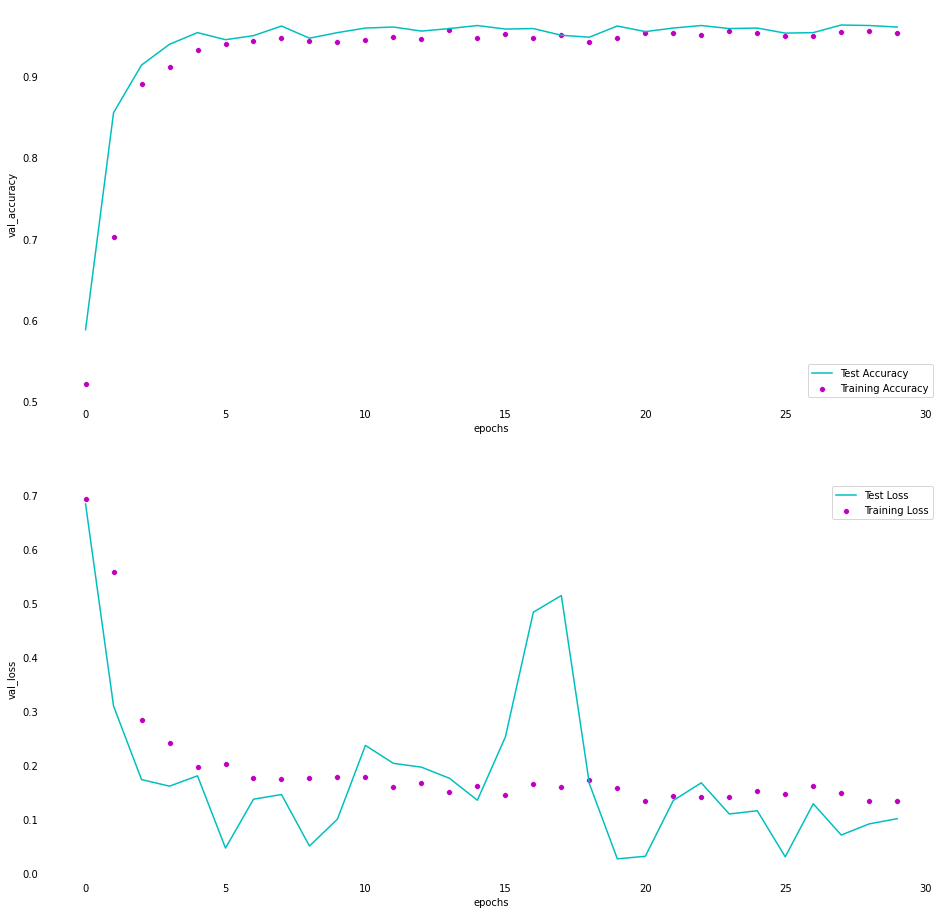

In [31]:
fig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(16,16))
sns.scatterplot(x='epochs',y='accuracy',data=acc,ax=ax,color='m')
sns.lineplot(x='epochs',y='val_accuracy',data=acc,ax=ax,color='c')
sns.scatterplot(x='epochs',y='loss',data=acc,ax=ax1,color='m')
sns.lineplot(x='epochs',y='val_loss',data=acc,ax=ax1,color='c')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

In [32]:
parasite_data = parasite_datagen.flow_from_directory('/content/resizedCellsImagesMalaria',
                                                     target_size=(64,64),
                                                     batch_size=32,
                                                     class_mode = 'binary')

Found 27558 images belonging to 2 classes.


In [33]:
uninfected_data = uninfected_datagen.flow_from_directory('/content/resizedCellsImagesMalaria',
                                                        target_size=(64,64),
                                                        batch_size=32,
                                                        class_mode = 'binary')

Found 27558 images belonging to 2 classes.
